Sequential AVL Tree

Reference (Chinese): https://www.cnblogs.com/skywang12345/p/3576969.html

TODO List:
1. fixHeight after ~~rotate~~/~~insert~~ /remove
2. implement remove

In [6]:
from graphviz import Digraph
from IPython.display import Image, display

class Node(object):
    def __init__(self, dkey, dval):
        self.key = dkey # comparable, assume int
        self.val = dval # any type, None means this node is conceptually not present
        
        self.height = 0
        
        # Nodes
        self.parent = None # None means this node is the root node
        self.left = None
        self.right = None
        

def strTree(droot):
    """
    perform a pretty print, stringified
    """
    stree = ""
    dnode = droot
    def DFSNode(ddnode, dstree):
        if ddnode==None:
            dstree += "·"
            return dstree
        else:
            dstree += ddnode.val
        if ddnode.height>0:
            dstree += "("
            dstree = DFSNode(ddnode.left, dstree)
            dstree += ","
            dstree = DFSNode(ddnode.right, dstree)
            dstree += ")"
        return dstree
    stree = DFSNode(dnode, stree)
    return stree


def getNode(droot, dkey):
    """
    if dkey presents, return the node,
    otherwise, return the future dkey's parent node
    """
    dnode = droot
    while True:
        if dnode.key==dkey or dnode.height==0:
            return dnode
        else:
            if dkey<dnode.key:
                if dnode.left==None:
                    return dnode
                else:
                    dnode = dnode.left
            else:
                if dnode.right==None:
                    return dnode
                else:
                    dnode = dnode.right

def putNode(droot, dkey, dval):
    """
    if dkey presents, perform update,
    otherwise perform insertion
    """
    tnode = getNode(droot, dkey)
    if tnode.key==dkey:
        # update
        tnode.val = dval
    else:
        # insert
        if dkey<tnode.key:
            tnode.left = Node(dkey, dval)
            tnode.left.parent = tnode
        else:
            tnode.right = Node(dkey, dval)
            tnode.right.parent = tnode
        # update height: iteratively
        hnode = tnode
        if hnode.height==0:
            while not hnode==None:
                hnode.height = max(
                    hnode.height, 
                    hnode.left.height+1 if not hnode.left==None else 0, 
                    hnode.right.height+1 if not hnode.right==None else 0
                )
                hnode = hnode.parent

def getMinNode(droot):
    """
    return the node with minimum key, including droot
    """
    m = droot
    dnode = droot
    while dnode.left!=None:
        dnode = dnode.left
        if dnode.key<m.key:
            m = dnode
    return m

def getMaxNode(droot):
    """
    return the node with maximum key, including droot
    """
    m = droot
    dnode = droot
    while dnode.right!=None:
        dnode = dnode.right
        if dnode.key>m.key:
            m = dnode
    return m

def removeNode(droot, dkey):
    """
    if dkey exists, remove the corresponding node and return its parent,
    otherwise return None (means failure)
    EXCEPTION: if the node to remove is ROOT, invalidate this operation and return None
    """
    tnode = getNode(droot, dkey)
    if tnode.key==dkey:
        # found a node: just remove it
        if tnode.parent==None:
            # it's ROOT
            print("WARNING: Trying to remove ROOT, operation is invalidated.")
            return None
        else:
            if tnode.height==0:
                # no children, simply remove itself
                p = tnode.parent
                if tnode.key==p.key:
                    # special case: in a recursive remove e.g. 8(4,7) -> 4(4,7) or 7(4,7)
                    if p.left!=None and p.left.key==tnode.key:
                        p.left = None
                    else:
                        p.right = None
                elif tnode.key<p.key:
                    p.left = None
                else:
                    p.right = None
                tnode.parent = None
                fixHeight(p)
                return p
            elif tnode.left!=None:
                maxnode = getMaxNode(tnode.left)
                tnode.key = maxnode.key
                tnode.val = maxnode.val
                _ = removeNode(tnode.left, maxnode.key) # recursive, only once
                # no need to fixHeight
                return tnode.parent
            else:
                minnode = getMinNode(tnode.right)
                tnode.key = minnode.key
                tnode.val = minnode.val
                _ = removeNode(tnode.right, minnode.key) # recursive, only once
                # no need to fixHeight
                return tnode.parent
    else:
        # cannot find a node: print WARNING
        print("WARNING: No matching node found, operation is invalidated.")
        return None

def fixHeight(dnode):
    """
    fix the height properties from dnode back to ROOT
    used in remove method
    """
    if dnode.left==None and dnode.right==None:
        dnode.height = 0
    else:
        dnode.height = max(
            dnode.left.height if dnode.left!=None else 0,
            dnode.right.height if dnode.right!=None else 0
        )+1
    ddnode = dnode
    while ddnode.parent!=None:
        ddnode = ddnode.parent
        if ddnode.left==None and ddnode.right==None:
            ddnode.height = 0
        else:
            ddnode.height = max(
                ddnode.left.height if ddnode.left!=None else 0,
                ddnode.right.height if ddnode.right!=None else 0
            )+1
                
def balanceCheck(droot):
    """
    should check after every modification
    return imbalanced node for rotation,
    otherwise return None
    """
    def DFSNode(ddnode):
        if ddnode.left.height*ddnode.right.height==0:
            if abs(ddnode.left.height-ddnode.right.height)>=2:
                # imbalanced node
                return ddnode
        
        lR = None
        rR = None
        if ddnode.left.left!=None and ddnode.left.right!=None:
            lR = DFSNode(ddnode.left)
        if ddnode.right.left!=None and ddnode.right.right!=None:
            rR = DFSNode(ddnode.right)
        if lR!=None:
            return lR
        if rR!=None:
            return rR
        return None

    return DFSNode(droot)

def rotateLL(dnode):
    """
    base type
    rotate LL type, return root node of subtree
    """
    k2 = dnode
    k1 = dnode.left
    y = k1.right
    if k2.parent!=None:
        p = k2.parent
        if p.left.key==k2.key:
            p.left = k1
        else:
            p.right = k1
        k1.parent = p
    else:
        k1.parent = None
        
    k2.left = y
    if y!=None:
        y.parent = k2

    k1.right = k2
    k2.parent = k1
    
    # fix heights here
    k2.height = max(
        k2.left.height if k2.left!=None else 0, 
        k2.right.height if k2.right!=None else 0
    )+1
    k1.height = max(
        k1.left.height if k1.left!=None else 0, 
        k1.right.height if k1.right!=None else 0
    )+1
    
    return k1

def rotateLR(dnode):
    """
    complex type
    rotate LR type, return root node of subtree
    """
    k3 = dnode
    k1 = k3.left
    k2 = k1.right
    
    # first do an RR on k1
    k2 = rotateRR(k1)
    # then do an LL on k3
    k2 = rotateLL(k3)
    # no need to fix height
    return k2

def rotateRL(dnode):
    """
    complex type
    rotate RL type, return root node of subtree
    """
    k1 = dnode
    k3 = k1.right
    k2 = k3.left
    
    # first do an LL on k3
    k2 = rotateLL(k3)
    # then do an RR on k1
    k2 = rotateRR(k1)
    # no need to fix height
    return k2
    

def rotateRR(dnode):
    """
    base type
    rotate RR type, return root node of subtree
    """
    k1 = dnode
    k2 = dnode.right
    y = k2.left
    if k1.parent!=None:
        p = k1.parent
        if p.left.key==k1.key:
            p.left = k2
        else:
            p.right = k2
        k2.parent = p
    else:
        k2.parent = None
    
    k1.right = y
    if y!=None:
        y.parent = k1
    
    k2.left = k1
    k1.parent = k2
    
    # fix heights here
    k1.height = max(
        k1.left.height if k1.left!=None else 0, 
        k1.right.height if k1.right!=None else 0
    )+1
    k2.height = max(
        k2.left.height if k2.left!=None else 0, 
        k2.right.height if k2.right!=None else 0
    )+1
    
    return k2

def rotateCheck(dnode):
    """
    check and determine the type of rotation
    """
    if dnode.left.height==0:
        # R*
        if dnode.right.left.height==0:
            print("#RR")
            return rotateRR
        else:
            print("#RL")
            return rotateRL
    else:
        # L*
        if dnode.left.left.height==0:
            print("#LR")
            return rotateLR
        else:
            print("#LL")
            return rotateLL
        
def getROOT(dnode):
    """
    trace back to the actual top ROOT node
    """
    ddnode = dnode
    while ddnode.parent!=None:
        ddnode = ddnode.parent
    return ddnode


def buildGraph(G, node, dir=None):
    G.node(str(node.key), str(node.key))
    if node.parent is not None:
        G.edge(str(node.parent.key), str(node.key), label = dir)
    if node.left is not None:
        G = buildGraph(G, node.left, dir='l')
    if node.right is not None:
        G = buildGraph(G, node.right, dir='r')
    return G

def prettyPrintTree(root):
    G=Digraph(format='png')
    G = buildGraph(G, root)
    display(Image(G.render()))

In [4]:
a = LL_ROOT
a = None
print(LL_ROOT)

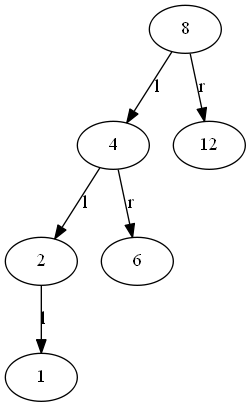

8(4(2(1,·),6),12)
8
4(2(1,·),8(6,12))


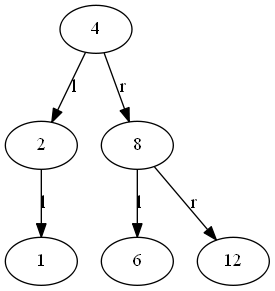

In [7]:
LL_ROOT = Node(8,"8")
putNode(LL_ROOT, 4, "4")
putNode(LL_ROOT, 12, "12")
putNode(LL_ROOT, 2, "2")
putNode(LL_ROOT, 6, "6")
putNode(LL_ROOT, 1, "1")
prettyPrintTree(LL_ROOT)

print(strTree(LL_ROOT))
b = balanceCheck(LL_ROOT)
print(b.val)
subroot = rotateLL(LL_ROOT)
LL_ROOT = getROOT(subroot)
print(strTree(LL_ROOT))

prettyPrintTree(LL_ROOT)


In [3]:
RR_ROOT = Node(8,"8")
putNode(RR_ROOT, 4, "4")
putNode(RR_ROOT, 12, "12")
putNode(RR_ROOT, 10, "10")
putNode(RR_ROOT, 14, "14")
putNode(RR_ROOT, 13, "13")
print(strTree(RR_ROOT))
b = balanceCheck(RR_ROOT)
print(b.val)
subroot = rotateRR(RR_ROOT)
RR_ROOT = getROOT(subroot)
print(strTree(RR_ROOT))

8(4,12(10,14(13,·)))
8
12(8(4,10),14(13,·))


In [4]:
LR_ROOT = Node(8,"8")
putNode(LR_ROOT, 4, "4")
putNode(LR_ROOT, 12, "12")
putNode(LR_ROOT, 2, "2")
putNode(LR_ROOT, 6, "6")
putNode(LR_ROOT, 5, "5")
print(strTree(LR_ROOT))
b = balanceCheck(LR_ROOT)
print(b.val)
subroot = rotateLR(LR_ROOT)
LR_ROOT = getROOT(subroot)
print(strTree(LR_ROOT))

8(4(2,6(5,·)),12)
8
6(4(2,5),8(·,12))


In [5]:
RL_ROOT = Node(8,"8")
putNode(RL_ROOT, 4, "4")
putNode(RL_ROOT,12, "12")
putNode(RL_ROOT, 10, "10")
putNode(RL_ROOT, 14, "14")
putNode(RL_ROOT, 9, "9")
print(strTree(RL_ROOT))
b = balanceCheck(RL_ROOT)
print(b.val)
subroot = rotateRL(RL_ROOT)
RL_ROOT = getROOT(subroot)
print(strTree(RL_ROOT))

8(4,12(10(9,·),14))
8
10(8(4,9),12(·,14))


In [6]:
# LL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 1, "1")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

8(4(2(1,·),6),12)
#LL
4(2(1,·),8(6,12))


In [7]:
# RR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 13, "13")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

8(4,12(10,14(13,·)))
#RR
12(8(4,10),14(13,·))


In [8]:
# LR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 5, "5")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

8(4(2,6(5,·)),12)
#LR
6(4(2,5),8(·,12))


In [9]:
# RL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT,12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 9, "9")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

8(4,12(10(9,·),14))
#RL
10(8(4,9),12(·,14))


In [10]:
# deepLL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 9, "9")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 1, "1")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

8(7(4(2(1,·),6),7.5),9(8.5,12))
#LL
8(4(2(1,·),7(6,7.5)),9(8.5,12))


In [11]:
# deepRR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 9, "9")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 13, "13")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

8(7(4,7.5),9(8.5,12(10,14(13,·))))
#RR
8(7(4,7.5),12(9(8.5,10),14(13,·)))


In [12]:
# deepLR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 9, "9")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 5, "5")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

8(7(4(2,6(5,·)),7.5),9(8.5,12))
#LR
8(6(4(2,5),7(·,7.5)),9(8.5,12))


8(7(4,7.5),8.5(8.1,12(10(9,·),14)))


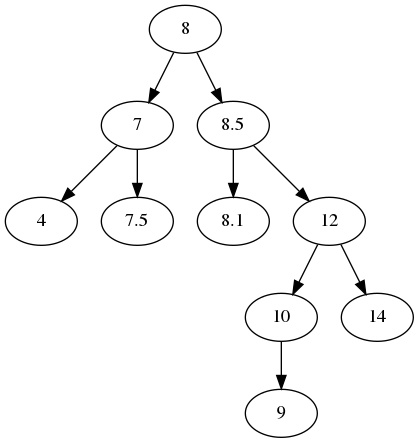

#RL
8(7(4,7.5),10(8.5(8.1,9),12(·,14)))


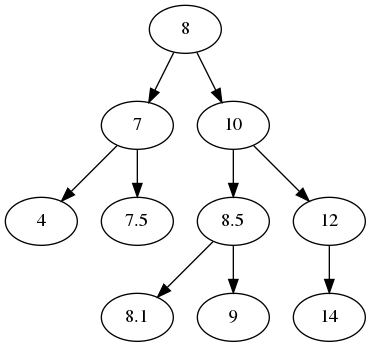

8(7,10(8.5(8.1,9),12(·,14)))


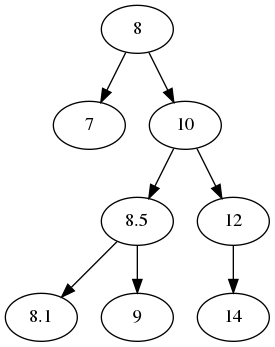

8
#RL
8.5(8(7,8.1),10(9,12(·,14)))


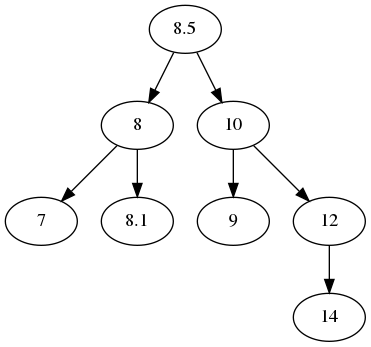

In [36]:
# deepRL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.1, "8.1")
putNode(AUTO_ROOT,12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 9, "9")
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)

# remove
res = removeNode(AUTO_ROOT,4)
res = removeNode(AUTO_ROOT,7.5)
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)

# rebalance
subroot = balanceCheck(AUTO_ROOT)
print(subroot.key)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)